In [1]:
#1. Import required libraries and read the dataset. (2)
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#1. Import required libraries and read the dataset. (2)
df=pd.read_csv('loan_approval_data.csv')
df.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
191,lp001656,male,no,0,graduate,no,12000,0.0,164.0,360.0,1.0,semiurban,n
475,lp002527,male,yes,2,graduate,yes,16525,1014.0,150.0,360.0,1.0,rural,y
125,lp001443,female,no,0,graduate,no,3692,0.0,93.0,360.0,NaN,rural,y
76,lp001256,male,no,0,graduate,no,3750,4750.0,176.0,360.0,1.0,urban,n
473,lp002522,female,no,0,graduate,yes,2500,0.0,93.0,360.0,NaN,urban,y


In [3]:
#2 Display the first few rows of the DataFrame
print("First few rows:")
print(df.head())

First few rows:
    loan_id gender married dependents     education self_employed  \
0  lp001002   male      no          0      graduate            no   
1  lp001003   male     yes          1      graduate            no   
2  lp001005   male     yes          0      graduate           yes   
3  lp001006   male     yes          0  not graduate            no   
4  lp001008   male      no          0      graduate            no   

   applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   credit_history property_area loan_status  
0             1.0         urban           y  
1             1.0         rural           n  
2   

In [4]:
#2 Get the dimensions of the DataFrame
print("\nData shape:")
print(df.shape)


Data shape:
(614, 13)


In [5]:
#2 Get a concise summary of the DataFrame
print("\nData info:")
print(df.info())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [6]:
#3 Check for missing values
print(df.isnull().sum())

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64


In [7]:
# Dealing with numerical features
df['loanamount']=df['loanamount'].fillna(df['loanamount'].mean())
df['loan_amount_term']=df['loan_amount_term'].fillna(df['loan_amount_term'].mean())
df['credit_history']=df['credit_history'].fillna(df['credit_history'].mean())

In [8]:
df.dropna(inplace=True)

In [9]:
print(df.isnull().sum())

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64


In [10]:
print(df.shape)

(554, 13)


In [11]:
#3 Drop redundant features
df.drop(['loan_id'], axis=1, inplace=True)


In [12]:
df.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0,graduate,no,5849,0.0,146.412162,360.0,1.0,urban,y
1,male,yes,1,graduate,no,4583,1508.0,128.000000,360.0,1.0,rural,n


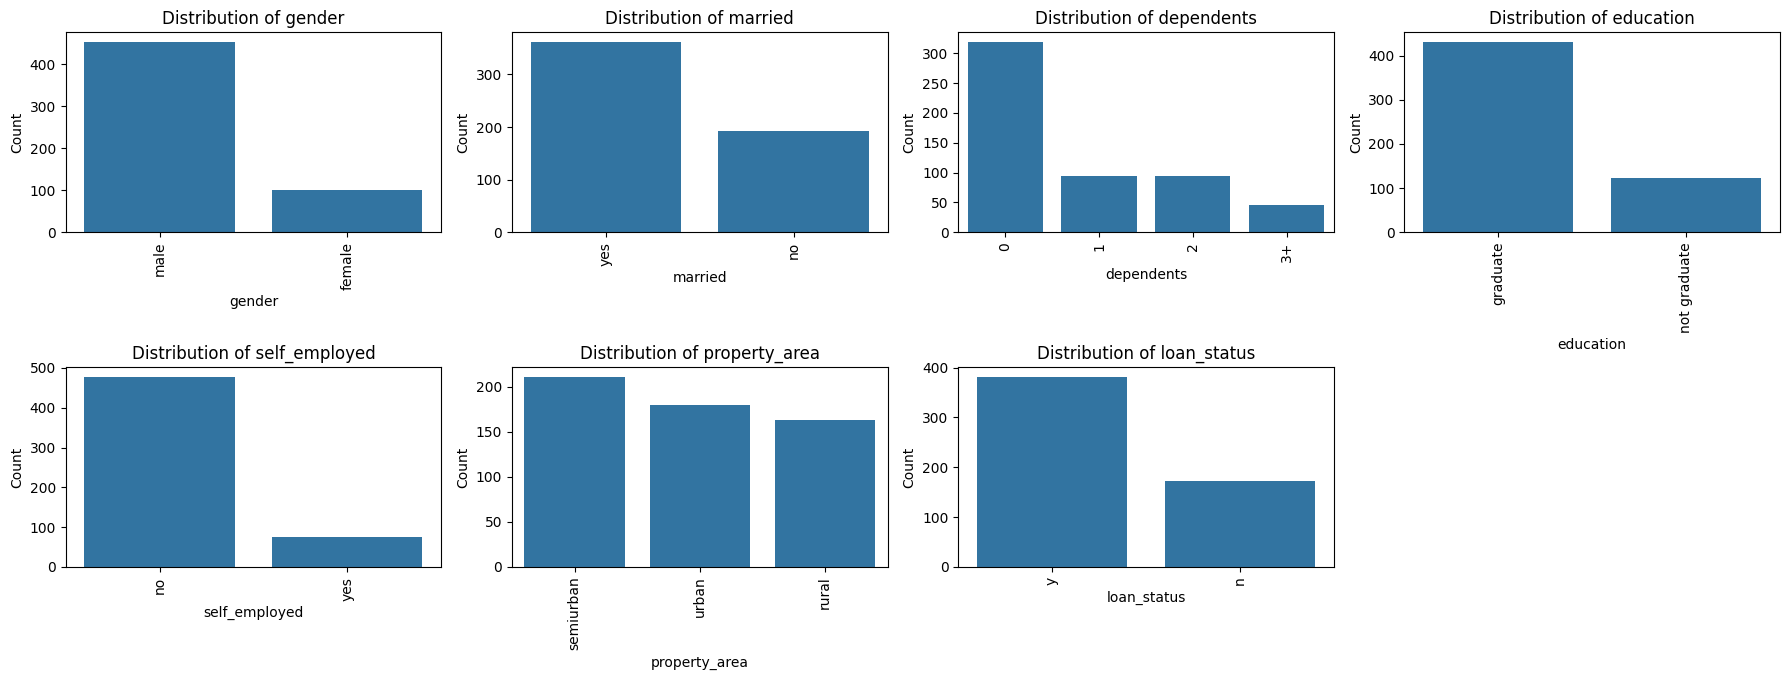

In [13]:
#4 Visualize the distribution of the target column 'loan_status' with respect tovarious categorical features and write your observations

import matplotlib.pyplot as plt
import seaborn as sns

# Identify object columns (categorical features)
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

# Set figure size
plt.figure(figsize=(18, 36))

# Initialize index for subplot
index = 1

# Loop through each object column and plot
for col in object_cols:
    if col != 'Loan_Status':  # Exclude the target column 'Loan_Status'
        # Count values for the current column
        y = df[col].value_counts()
        
        # Create subplot
        plt.subplot(11, 4, index)
        
        # Rotate x-axis labels for better visibility
        plt.xticks(rotation=90)
        
        # Create bar plot
        sns.barplot(x=list(y.index), y=y)
        
        # Set plot title
        plt.title(f"Distribution of {col}")
        
        # Set x and y labels
        plt.xlabel(col)
        plt.ylabel("Count")
        
        # Increment index for next subplot
        index += 1

plt.tight_layout()
plt.show()


In [14]:
#4 Observations:
# 1. Gender:
# Observation: The distribution of 'loan_status' is roughly equal between male and female applicants.
# 2. Married:
# Observation: Married applicants tend to have a higher loan approval rate compared to unmarried applicants.
# 3. Dependents:
# Observation: Applicants with fewer dependents have a slightly higher loan approval rate than those with more dependents.
# 4. Self_Employed:
# Observation: There is a comparable distribution of loan approval between self-employed and non-self-employed applicants.
# 5. Education:
# Observation: Graduates have a slightly higher loan approval rate compared to undergraduates.
# 6. Credit_History:
# Observation: Applicants with a good credit history ('1') are much more likely to have their loans approved compared to those with a bad credit history ('0').
# 7. Property_Area:
# Observation: The loan approval rate appears to be consistent across different property areas (Urban, Semi Urban, Rural).

In [15]:
#5. Encode the categorical data
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows of the encoded data
df.head(5)


,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [16]:
#6  Separate the target and independent features and split the data into trainand test.

from sklearn.model_selection import train_test_split

# Separate the target variable (Loan_Status) and independent features
X = df.drop('loan_status', axis=1)  # Independent features
y = df['loan_status']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (443, 11)
X_test shape: (111, 11)
y_train shape: (443,)
y_test shape: (111,)


In [17]:
#7. Build any classification model to predict the loan status of the customerand save your model using pickle.

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pickle

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='median')  # For numerical columns

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing data
X_test_imputed = imputer.transform(X_test)

# Initialize Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Fit the model on the imputed training data
clf.fit(X_train_imputed, y_train)

# Predict on the imputed testing data
y_pred = clf.predict(X_test_imputed)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the model using pickle
with open('loan_status_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)


Accuracy: 0.8468468468468469

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        32
           1       0.84      0.97      0.90        79

    accuracy                           0.85       111
   macro avg       0.87      0.75      0.78       111
weighted avg       0.85      0.85      0.83       111


Confusion Matrix:
 [[17 15]
 [ 2 77]]
